In [1]:
import daft
from matplotlib import rc

In [2]:
rc("font", family="serif", size=9)
rc("text", usetex=True)
rc('text.latex', preamble=r'\usepackage{newtxtext,newtxmath}')

/Users/ajl573/.virtualenvs/base/lib/python3.7/site-packages/daft.py:789: RuntimeWarning: divide by zero encountered in double_scalars
  dxx2 = self.scale * 0.5 * np.abs(dx / dy) * (np.sign(dx) or 1.0)


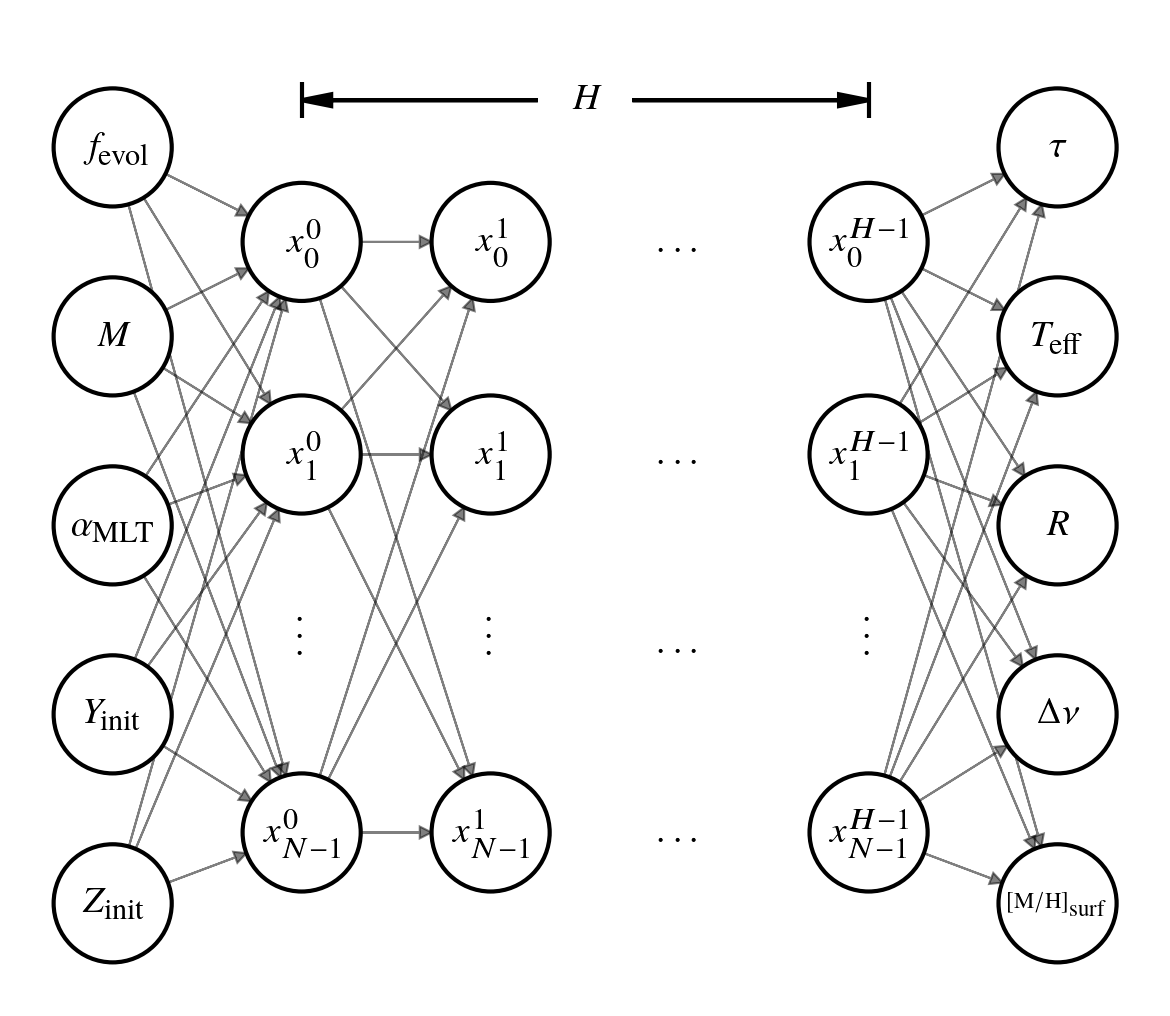

In [5]:
node_params = {'facecolor': 'white'}

# Instantiate the PGM.
pgm = daft.PGM()

# Inputs
pgm.add_node("f_age", r"$f_{\mathrm{evol}}$", 1.5, 4.5, plot_params=node_params)
pgm.add_node("mass", r"$M$", 1.5, 3.7, plot_params=node_params)
pgm.add_node("mlt", r"$\alpha_\mathrm{MLT}$", 1.5, 2.9, plot_params=node_params)
pgm.add_node("y", r"$Y_{\mathrm{init}}$", 1.5, 2.1, plot_params=node_params)
pgm.add_node("z", r"$Z_\mathrm{init}$", 1.5, 1.3, plot_params=node_params)

# Neural network
pgm.add_node('net00', r'$x_{0}^{0}$', 2.3, 4.1)
pgm.add_node('net10', r'$x_{1}^{0}$', 2.3, 3.2)
pgm.add_node('dots0', r'$\vdots$', 2.3, 2.4, plot_params={'edgecolor': 'none'})
pgm.add_node('netN0', r'$x_{N-1}^{0}$', 2.3, 1.6)

pgm.add_node('net01', r'$x_{0}^{1}$', 3.1, 4.1)
pgm.add_node('net11', r'$x_{1}^{1}$', 3.1, 3.2)
pgm.add_node('dots1', r'$\vdots$', 3.1, 2.4, plot_params={'edgecolor': 'none'})
pgm.add_node('netN1', r'$x_{N-1}^{1}$', 3.1, 1.6)

pgm.add_node('dots20', r'$\dots$', 3.9, 4.1, plot_params={'edgecolor': 'none'})
pgm.add_node('dots21', r'$\dots$', 3.9, 3.2, plot_params={'edgecolor': 'none'})
pgm.add_node('dots22', r'$\dots$', 3.9, 2.4, plot_params={'edgecolor': 'none'})
pgm.add_node('dots23', r'$\dots$', 3.9, 1.6, plot_params={'edgecolor': 'none'})

pgm.add_node('net0M', r'$x_{0}^{H-1}$', 4.7, 4.1)
pgm.add_node('net1M', r'$x_{1}^{H-1}$', 4.7, 3.2)
pgm.add_node('dots3', r'$\vdots$', 4.7, 2.4, plot_params={'edgecolor': 'none'})
pgm.add_node('netNM', r'$x_{N-1}^{H-1}$', 4.7, 1.6)

# Outputs
pgm.add_node("age", r"$\tau$", 5.5, 4.5, plot_params=node_params)
pgm.add_node("teff", r"$T_{\mathrm{eff}}$", 5.5, 3.7, plot_params=node_params)
pgm.add_node("rad", r"$R$", 5.5, 2.9, plot_params=node_params)
pgm.add_node("dnu", r"$\Delta\nu$", 5.5, 2.1, plot_params=node_params)
pgm.add_node("smh", r"$[\mathrm{M}/\mathrm{H}]_\mathrm{surf}$", 5.5, 1.3, fontsize=5, plot_params=node_params)

pgm.add_node('layers', r'$H$', 3.5, 4.7, scale=0.8, plot_params={'edgecolor': 'none'})
pgm.add_node('start', '', 2.3, 4.7, shape='rectangle', scale=0.3, aspect=0.)
pgm.add_node('end', '', 4.7, 4.7, shape='rectangle', scale=0.3, aspect=0.)

pgm.add_edge('layers', 'start')
pgm.add_edge('layers', 'end')

layers = [['y', 'z', 'mass', 'f_age', 'mlt'], ['net00', 'net10', 'netN0'], 
          ['net01', 'net11', 'netN1']]

for i, layer in enumerate(layers[:-1]):
    for node0 in layer:
        for node1 in layers[i+1]:
            pgm.add_edge(node0, node1, plot_params={'alpha': 0.5, 'linewidth': 0.5, 'head_length': 0.1})

for node0 in ['net0M', 'net1M', 'netNM']:
    for node1 in ['age', 'rad', 'teff', 'smh', 'dnu']:
        pgm.add_edge(node0, node1, plot_params={'alpha': 0.5, 'linewidth': 0.5, 'head_length': 0.1})

pgm.render(dpi=300)

### Save

In [6]:
pgm.savefig("pgms/network_10.pdf")
pgm.savefig("pgms/network_10.png", dpi=300)

In [7]:
pgm.savefig("../paper/figures/network_10.png", dpi=300)